In [156]:
import warnings
import os
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
print(os.getcwd())
data_1 =  pd.read_csv("new_form.csv", delimiter=';', encoding='windows-1251')
data_1.head(5)

C:\Users\user\ML\BP


,Столбец1,Столбец2,Столбец3,Столбец4,Столбец5
0,9.17.2024 22:09:19,363.0,8-9,NaN,NaN
1,9.17.2024 22:14:01,476.0,10,NaN,NaN
2,9.17.2024 23:02:55,492.0,8-9,NaN,NaN
3,9.17.2024 22:32:48,502.0,8-9,NaN,NaN
4,9.17.2024 22:23:36,510.0,10,NaN,NaN


In [158]:
data_1.columns = ["datetime", "score", "category", "1", "2"]
data_1 = data_1.drop(["1", "2"], axis=1)
data_1["category"] = data_1["category"].str.replace("8-9", "8-9 классы").str.replace("10", "10 классы")

In [ ]:
data_1.info()

In [100]:
data_1.columns = ["id", "datetime", "category", "score"]
data_1.head(5)

,id,datetime,category,score
0,1492136446,2023-09-23 03:31:10,СПО,530
1,1492138658,2023-09-23 03:47:53,СПО,547
2,1487706335,2023-09-19 06:15:37,10 классы,583
3,1487707831,2023-09-19 06:18:53,10 классы,619
4,1487708526,2023-09-19 06:20:20,8-9 классы,611


In [154]:
data_1 = data_1.drop(["id"], axis = 1)
data_1.info()

KeyError: "['id'] not found in axis"

In [160]:
data_1 = data_1.sort_values(by=["score"])
data_1.head(20)

,datetime,score,category
1087,9.18.2024 17:34:49,10.0,10 классы
1395,9.18.2024 17:55:49,36.0,8-9 классы
1229,9.18.2024 17:46:19,90.0,8-9 классы
1162,9.18.2024 17:40:29,200.0,10 классы
1632,9.18.2024 18:29:56,206.0,8-9 классы
645,9.18.2024 17:02:56,225.0,10 классы
1132,9.18.2024 17:38:02,233.0,8-9 классы
523,9.18.2024 16:33:37,240.0,8-9 классы
1325,9.18.2024 17:50:40,243.0,8-9 классы
689,9.18.2024 17:14:00,245.0,8-9 классы


In [168]:
data_1 = data_1[data_1["score"].apply(lambda x: x <  730 and x >  400)]
#data_1 = data_1[data_1["score"].apply(lambda x: int(x) <  730 and int(x) >  400)]
#data_1["score"] = data_1["score"].astype(np.int64, errors="ignore")
data_1.tail(10)

,datetime,score,category
1558,9.18.2024 18:14:55,694.0,8-9 классы
358,9.18.2024 16:17:47,697.0,10 классы
1362,9.18.2024 17:53:18,699.0,8-9 классы
1268,9.18.2024 17:48:13,700.0,8-9 классы
814,9.18.2024 17:23:53,700.0,10 классы
1368,9.18.2024 17:53:27,702.0,8-9 классы
732,9.18.2024 17:22:25,703.0,10 классы
616,9.18.2024 16:53:59,710.0,10 классы
1366,9.18.2024 17:53:22,711.0,10 классы
706,9.18.2024 17:18:56,711.0,8-9 классы


In [170]:
data_1.insert(0, 'index', [x for x in range(1, data_1.shape[0] + 1)])

In [172]:
#data_1.set_index("index", inplace=True)

data_1.head(5)
data_10 = data_1[data_1["category"] == "10 классы"]
data_10 = data_10.sort_values("score")
data_10["index"] =np.arange(data_10.shape[0])+1
#data_10["index"] = pd.DataFrame([int(x) for x in range(1, data_10.shape[0] + 1)])

data_89 = data_1[data_1["category"] == "8-9 классы"]
data_89 = data_89.sort_values("score")
data_89["index"] =np.arange(data_89.shape[0])+1

# data_spo = data_1[data_1["category"] == "СПО"]
# data_spo = data_spo.sort_values("score")
# data_spo["index"] = pd.DataFrame([int(x) for x in range(1, data_spo.shape[0] + 1)])

In [186]:

data_89.info()



<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 294 to 706
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     836 non-null    int32  
 1   datetime  836 non-null    object 
 2   score     836 non-null    float64
 3   category  836 non-null    object 
dtypes: float64(1), int32(1), object(2)
memory usage: 29.4+ KB


<Axes: xlabel='index', ylabel='score'>

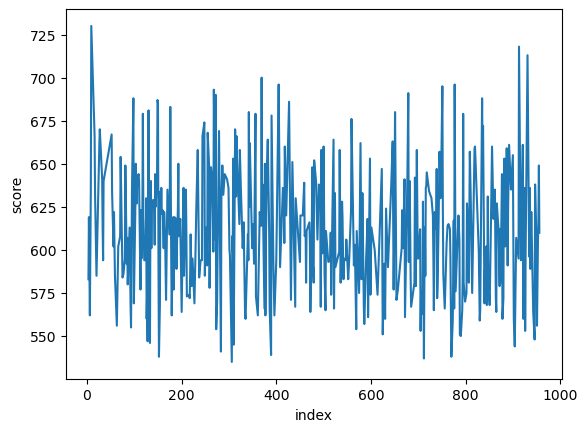

In [30]:
sb.lineplot(data=data_10, x = "index", y = "score")

In [178]:
point10 = data_1[data_1["category"] == "10 классы"].iloc[[data_10.shape[0]/4*3]]["score"].iloc[0]
point89 = data_1[data_1["category"] == "8-9 классы"].iloc[[data_89.shape[0]/4*3]]["score"].iloc[0]
# point_spo = data_1[data_1["category"] == "СПО"].iloc[[data_spo.shape[0]/4*3]]["score"].iloc[0]

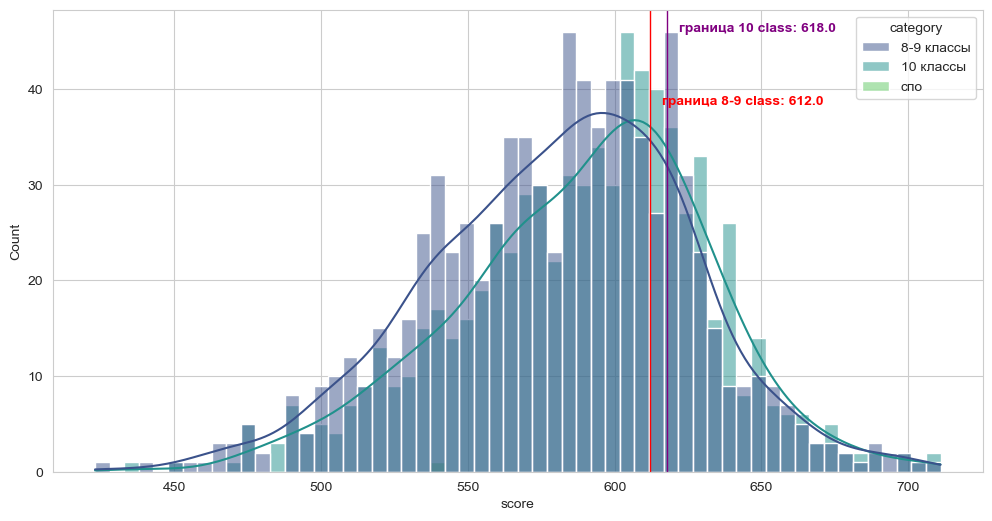

In [182]:
pl = plt.figure(figsize=(12,6))
sb.set_style("whitegrid")
ax = sb.histplot(data=data_1, x = "score", binwidth=5, kde=True, palette = "viridis", hue="category")
plt.axvline(point10, color='purple', label='граница-10', linewidth=1)
plt.text(x = point10 + 4, 
y = max([h.get_height() for h in ax.patches]),
s = 'граница 10 class: {}'.format(point10), # data label
 color = 'purple', weight='bold')

plt.axvline(point89, color='red', label='граница-8', linewidth=1)
plt.text(x = point89 + 4, 
y = max([h.get_height() for h in ax.patches])/1.2,
s = 'граница 8-9 class: {}'.format(point89), # data label
 color = 'red', weight='bold')

# plt.axvline(point_spo, color='green', label='граница-спо', linewidth=1)
# plt.text(x = point_spo + 4, 
# y = max([h.get_height() for h in ax.patches])/1.4,
# s = 'граница спо: {}'.format(point_spo), # data label
#  color = 'green', weight='bold')

pl.savefig("2.jpg", dpi = 600)

,index,datetime,category,score
1650,1532,2023-09-19 07:11:02,10 классы,637


,index,datetime,category,score
391,1465,2023-09-18 18:43:48,8-9 классы,633
